In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")
import os
import math
import numpy as np
import torch as t
import torch.utils.data as tdata
import matplotlib.pyplot as plt
from einops import rearrange
from dots.training import *
from dots.trainhooks import *
from dots.models import MLP
from dots.dots import *
from dots.utils import *
from dots.plotting import *
from dots.datasets import *
from dots.experiment import get_train_state

# Initial tests

In [61]:
model = MLP(2, 2, [100, 100])

In [15]:
ds = get_dataset("twoclasses")
X, y = x_y_tensors_of_dataset(ds)

In [63]:
model(t.tensor([[0, 0], [1, 1]]).float())

tensor([[ 0.1443,  0.0189],
        [ 0.1374, -0.0314]], grad_fn=<AddmmBackward0>)

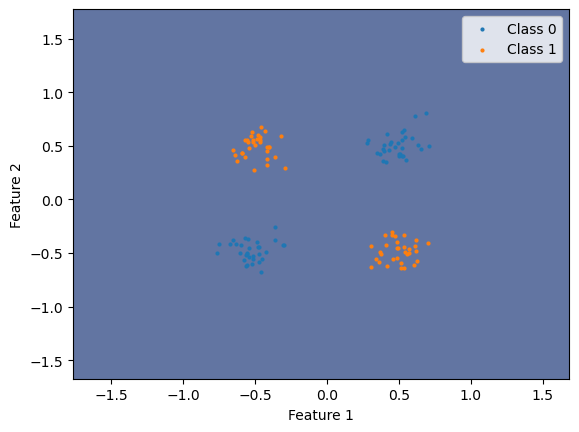

In [65]:
plot_decision_boundary(model, X, y, 0.05)

In [66]:
ts = get_train_state("../configs/models/mlp-twoclass.yml")

In [67]:
accuracy(ts.model, ds)

tensor(0.5000)

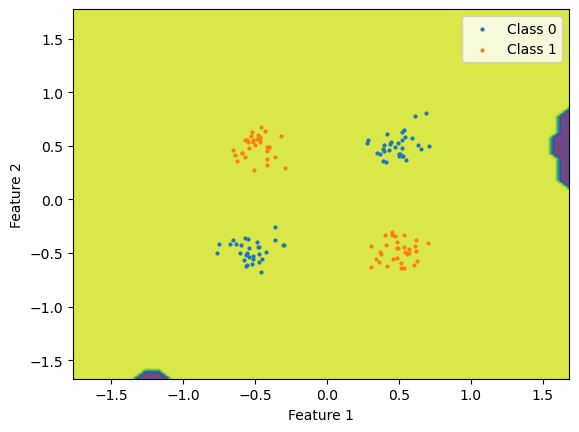

In [68]:
plot_decision_boundary(ts.model, X, y, 0.05)

In [69]:
ts.train(1)

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/training.py:270: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


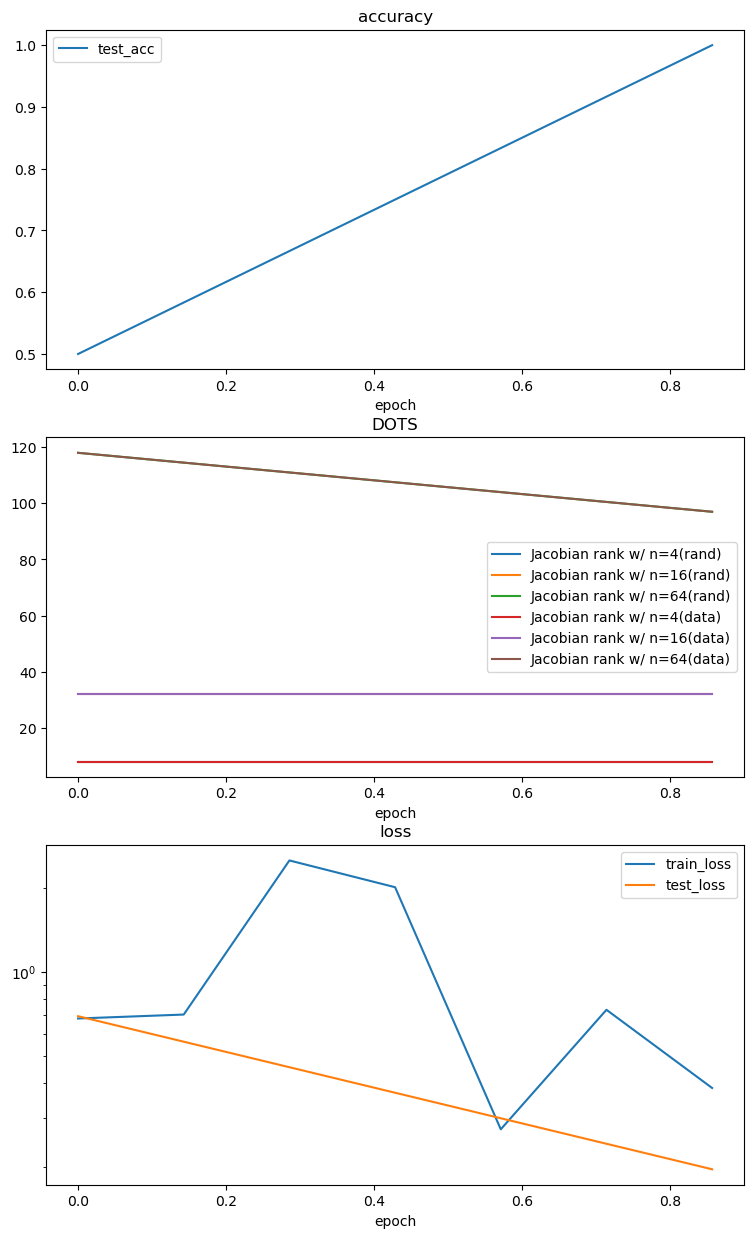

In [70]:
ts.plot()

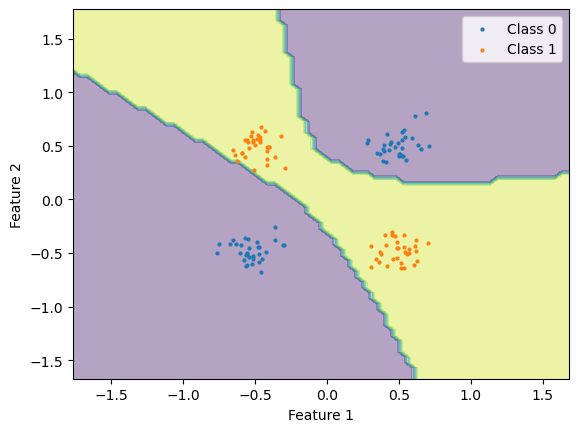

In [72]:
plot_decision_boundary(ts.model, X, y, 0.05)

# Random labels

In [30]:
ts = get_train_state("../configs/models/mlp-randtwoclass.yml")
ds = get_dataset("randtwoclasses")
X, y = x_y_tensors_of_dataset(ds)

In [123]:
ts.model.count_params()

17154

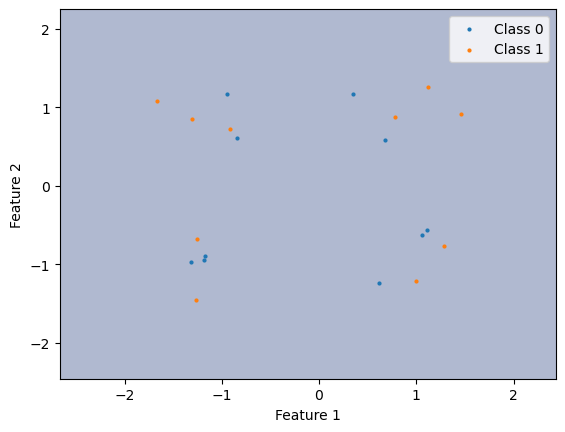

In [124]:
plot_decision_boundary(ts.model, X, y, 0.05)

In [125]:
ts.train(1000)

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/training.py:270: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


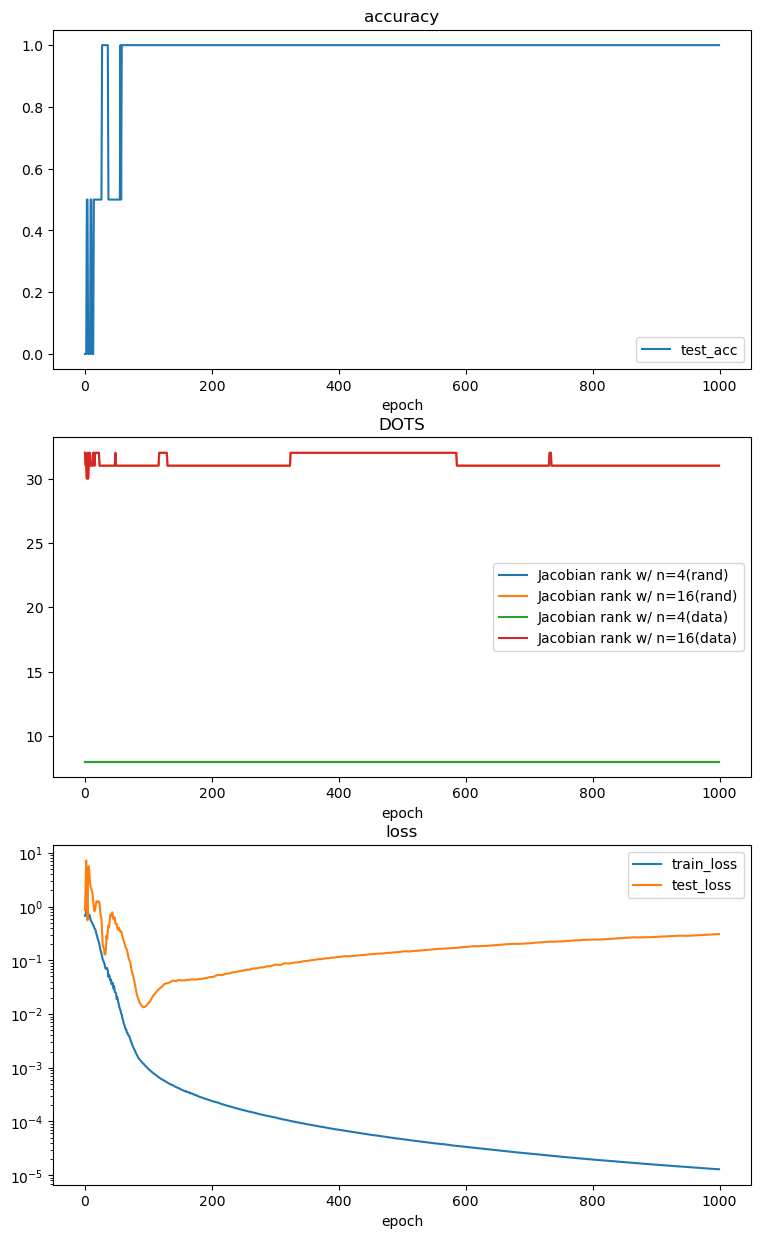

In [126]:
ts.plot()

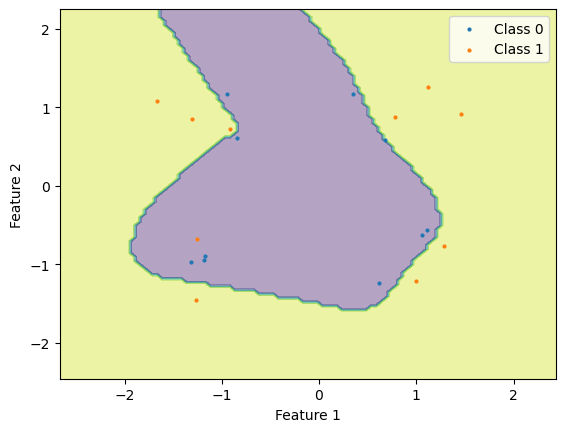

In [127]:
plot_decision_boundary(ts.model, X, y, 0.05)

# Random labels, from hp search

In [4]:
ts = get_train_state("../configs/models/mlp-randtwoclass.yml")
ds = get_dataset("randtwoclasses")
X, y = x_y_tensors_of_dataset(ds)

In [143]:
model = load_model("soft-sweep-140")

In [144]:
model

MLP(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=12, bias=True)
    (1): ReLU()
    (2): Linear(in_features=12, out_features=12, bias=True)
    (3): ReLU()
    (4): Linear(in_features=12, out_features=12, bias=True)
    (5): ReLU()
    (6): Linear(in_features=12, out_features=2, bias=True)
  )
)

In [29]:
plot_decision_boundary(model, X, y, 0.05)

NameError: name 'model' is not defined

In [146]:
accuracy(model, ds)

tensor(0.6000)

# BETTER HP SEARCH results visualization

In [5]:
from copy import deepcopy


ts = get_train_state("../configs/models/mlp-randtwoclass.yml")
ds = get_dataset("randtwoclasses")
X, y = x_y_tensors_of_dataset(ds)

ds2 = get_dataset("twoclasses")
X2, y2 = x_y_tensors_of_dataset(ds2)

In [32]:
memoriser = load_model("wise-sweep-4")

In [45]:
memoriser

MLP(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=2, bias=True)
  )
)

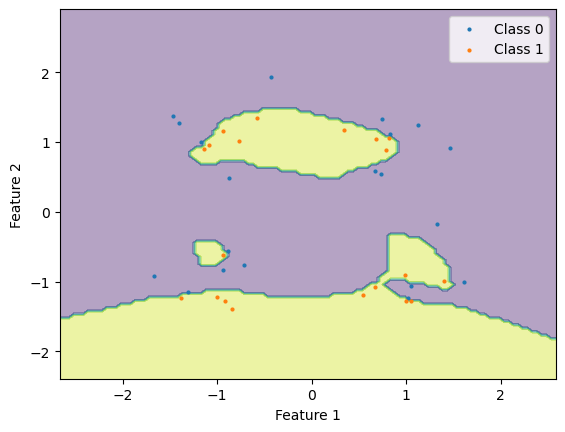

In [33]:
plot_decision_boundary(memoriser, X, y, 0.05)

In [34]:
recovered = deepcopy(memoriser)

In [37]:
ts = get_train_state("../configs/models/mlp-twoclass.yml")
ts.model = recovered
ts.optimiser = t.optim.Adam(ts.model.parameters(), lr=0.01)

In [38]:
ts.train(10)

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/training.py:270: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


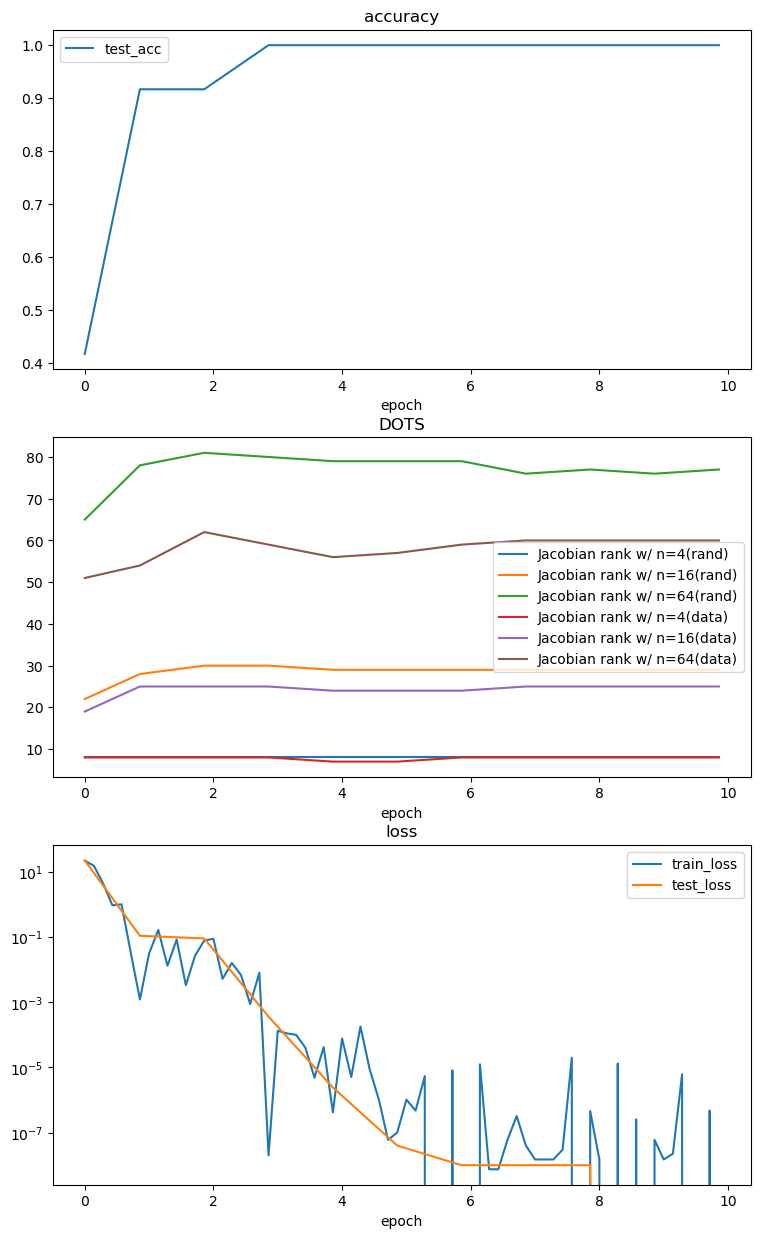

In [39]:
ts.plot()

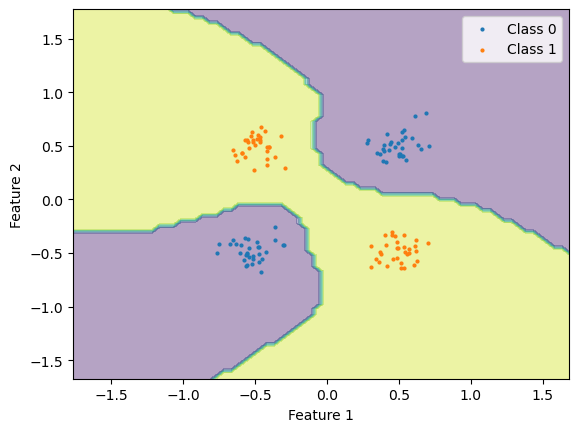

In [44]:
plot_decision_boundary(recovered, X2, y2, 0.05)

# randtwoclassHARD

In [13]:
ts = get_train_state("../configs/models/mlp-randtwoclass.yml")
ds = get_dataset("randtwoclassesHARD")
X, y = x_y_tensors_of_dataset(ds)

In [18]:
model1 = load_model("lucky-sweep-7")
model2 = load_model("giddy-sweep-60")

In [19]:
accuracy(model1, ds)

tensor(0.9600)

In [20]:
accuracy(model2, ds)

tensor(0.9600)

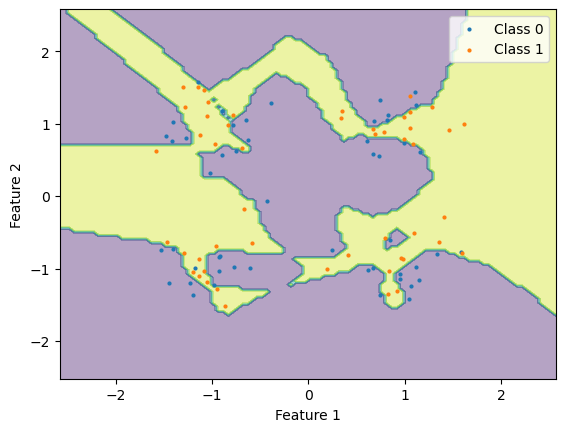

In [21]:
plot_decision_boundary(model1, X, y, 0.05)

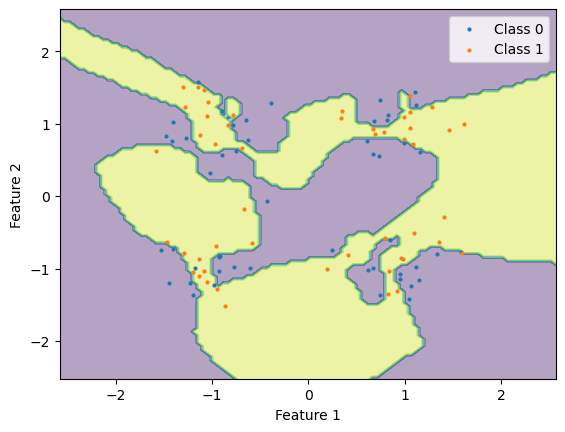

In [22]:
plot_decision_boundary(model2, X, y, 0.05)

In [23]:
ts = get_train_state("../configs/models/mlp-twoclass.yml")
ts.model = model2
ts.optimiser = t.optim.Adam(ts.model.parameters(), lr=0.01)

In [30]:
ts.train(10)

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/training.py:270: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


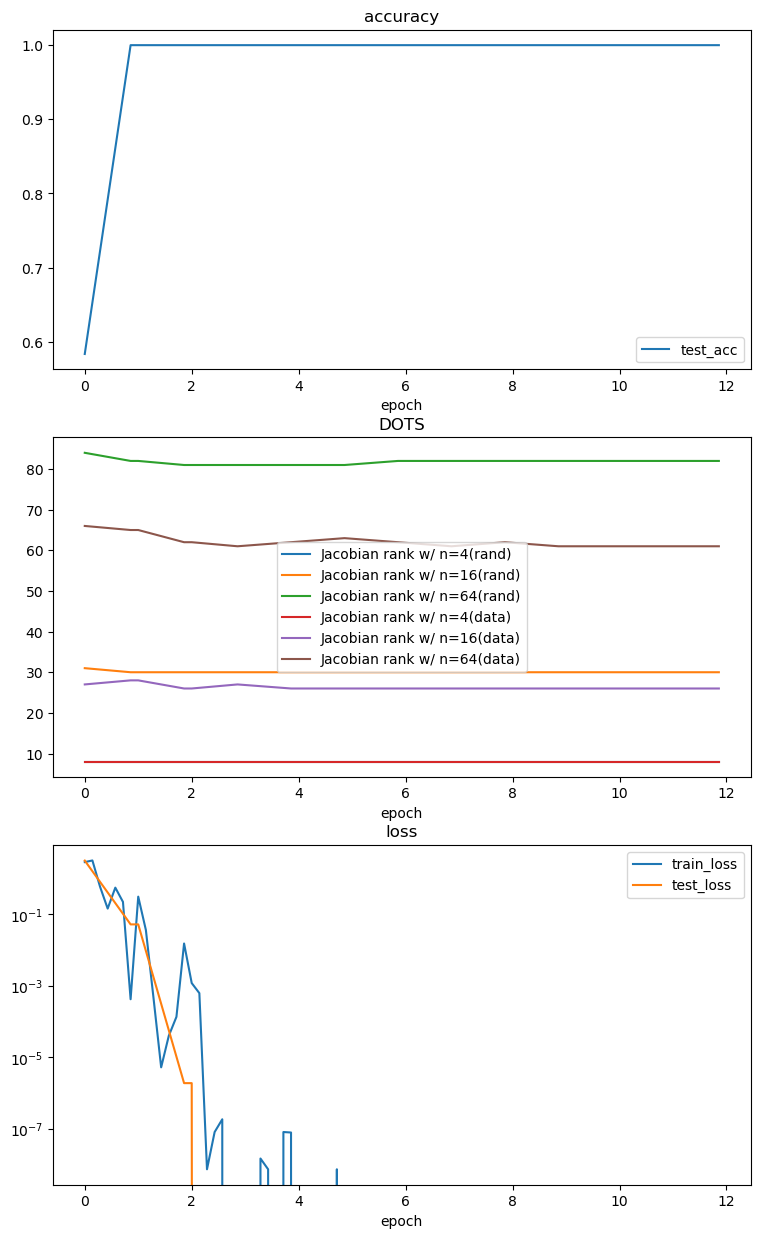

In [31]:
ts.plot()

### One epoch:

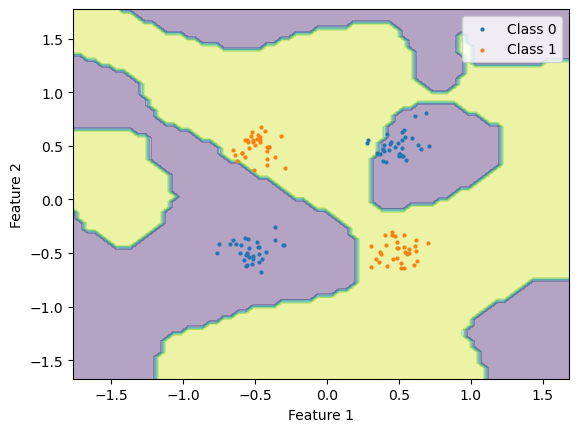

In [26]:
plot_decision_boundary(model2, X2, y2, 0.05)

### Two epochs:

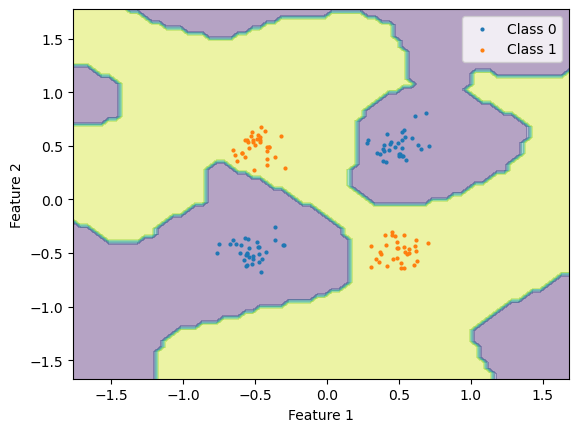

In [29]:

plot_decision_boundary(model2, X2, y2, 0.05)

### 12 epochs:

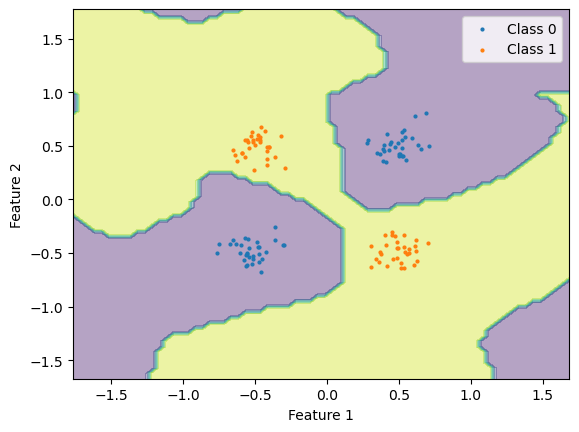

In [32]:

plot_decision_boundary(model2, X2, y2, 0.05)